<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [1644]:
import pandas as pd
import psycopg2

In [1645]:
# Код отключения предупреждений (см. ниже) - они не мешают работе, но отвлекают и занимают место.
# "UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) 
# or database string URI or sqlite3 DBAPI2 connection. 
# Other DBAPI2 objects are not tested. Please consider using SQLAlchemy".
import warnings
warnings.filterwarnings('ignore')

In [1646]:
# вставьте сюда параметры подключения из юнита 1. Работа с базой данных из Python 
DBNAME = 'project_sql'
USER = 'skillfactory'
PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'
HOST = '84.201.134.129'
PORT = 5432

In [1647]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

#### 1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице *vacancies*). 

In [1648]:
# текст запроса
query_3_1 = f'''
select 
    count(id) as cnt /* счет кол-ва вакансий по уникальному полю id, 
                    можно было бы выбрать все столбцы и вычислить ответ c помощью python */
from public.vacancies /* для оптимизации кода, далее схему public не буду использовать,
                    так как это единственная схема в этой базе (информация получена на вебинаре) */
'''

In [1649]:
# результат запроса
# используем метод read_sql_query, чтобы получить результаты запроса сразу в виде датафрейма
df_3_1 = pd.read_sql_query(query_3_1, connection)
# display(df_3_1) # проверка dataframe
print(f'Количество вакансий в таблице vacancies: {df_3_1.iloc[0][0]}') # вывод ответа

Количество вакансий в таблице vacancies: 49197


#### 2. Напишите запрос, который посчитает количество работодателей (таблица *employers*). 

In [1650]:
# текст запроса
query_3_2 = f'''
select 
    count(id) cnt -- счет кол-ва работодателей по уникальному полю id
from employers -- исходная таблица
'''

In [1651]:
# результат запроса
df_3_2 = pd.read_sql_query(query_3_2, connection)
# display(df_3_2) # проверка dataframe
print(f'Количество работодателей в таблице employers: {df_3_2.iloc[0][0]}') # вывод ответа

Количество работодателей в таблице employers: 23501


#### 3. Посчитате с помощью запроса количество регионов (таблица *areas*).

In [1652]:
# текст запроса
query_3_3 = f'''
select
    count(id) cnt -- счет кол-ва регионов по уникальному полю id
from areas -- исходная таблица
'''

In [1653]:
# результат запроса
df_3_3 = pd.read_sql_query(query_3_3, connection)
# display(df_3_3) # проверка dataframe
print(f'Количество регионов в таблице areas: {df_3_3.iloc[0][0]}') # вывод ответа

Количество регионов в таблице areas: 1362


#### 4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица *industries*).

In [1654]:
# текст запроса
query_3_4 = f'''
select
    count(id) cnt -- счет кол-ва сфер деятельности по уникальному полю id
from industries
'''

In [1655]:
# результат запроса
df_3_4 = pd.read_sql_query(query_3_4, connection)
# display(df_3_4) # проверка dataframe
print(f'Количество сфер деятельности в таблице industries: {df_3_4.iloc[0][0]}') # вывод ответа

Количество сфер деятельности в таблице industries: 294


***

#### **<span style=color:green>Юнит 3. Дополнительное исслелование:**
#### 3.5. Количество наименований вакансий и Топ-5 наиболее востребованных названий вакансий.

In [1887]:
query_3_5 = f'''
select 
    name,
    count(*) cnt
from vacancies
group by name
order by cnt desc
limit 5
'''

In [1888]:
# результат запроса
df_3_5 = pd.read_sql_query(query_3_5, connection)
display(df_3_5)

,name,cnt
0,Системный администратор,1761
1,Программист 1С,1153
2,Бизнес-аналитик,488
3,Специалист технической поддержки,457
4,Системный аналитик,432


#### **<span style=color:green>Юнит 3. Выводы по предварительному анализу данных**

После знакомства с данными в таблицах можно сделать следующие предварительные выводы:
* Количество вакансий более чем в 2 раза превышает количество работодателей, что вполне ожидаемо, так как организациям для успешного функционирования требуются разные специалисты.
* В базе представлено 1362 региона - это говорит о том, табличные данные охватывают довольно широкую географию.
* Организации - работодатели представляют 294 различные сферы деятельности, что также говорит о большом охвате данных.
* В таблице представлено 21222 различных наименований вакансий, что также говорит о больших возможностях для соискателей разных специальностей найти подходящую сеье работу
* Интересный факт: Тор-5 наиболее востребованных вакансий из сферы IT и анализа данных.  

**Представленные данные содержат большой объем информации о вакансиях в разных регионах и сферах деятельности, так что у соискателей  есть возможность выбора и есть неплохие шансы выбора комнании для реализации своего профессионального потенциала.**

***

# Юнит 4. Детальный анализ вакансий

#### 1. Напишите запрос, который позволит узнать, сколько (*cnt*) вакансий в каждом регионе (*area*). Отсортируйте по количеству вакансий **в порядке убывания**.

In [1659]:
# текст запроса
query_4_1 = f'''
select
    a.name as area, --  список регионов из таблицы areas
    count(v.area_id) as cnt -- подсчет кол-ва вакансий из таблицы vacancies
from areas a
    join vacancies v on a.id = v.area_id -- соединение таблиц 
group by area -- группировка по признаку area
order by count(v.area_id) desc -- сортировка по убыванию
limit 5 -- выбор топ 5
'''

In [1660]:
# результат запроса
df_4_1 = pd.read_sql_query(query_4_1, connection)
# display(df_4_1) # проверка dataframe
print(f"Топ 5 регионов по количеству вакансий:\n\
{', '.join(df_4_1['area'].values.tolist())}") # вывод ответа

Топ 5 регионов по количеству вакансий:
Москва, Санкт-Петербург, Минск, Новосибирск, Алматы


#### 2. Напишите запрос, чтобы определить у какого количества вакансий заполнено **хотя бы одно** из двух полей с зарплатой.

In [1661]:
# текст запроса
query_4_2 = f'''
select
    count(id) cnt -- подсчет кол-ва уникальных вакансий
from vacancies 
where (salary_from is not null) or (salary_to is not null) -- фильтр вакансий по условию задачи
'''

In [1662]:
# результат запроса
df_4_2 = pd.read_sql_query(query_4_2, connection)
# display(df_4_2) # проверка dataframe
print(f'Количество вакансий, у которых заполнено хотя бы одно из двух \
полей с зарплатой: {df_4_2.iloc[0,0]}') # вывод ответа

Количество вакансий, у которых заполнено хотя бы одно из двух полей с зарплатой: 24073


#### 3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до **целого числа**.

In [1663]:
# текст запроса
query_4_3 = f'''
select
    round(avg(salary_from), 0) avg_salart_from, /* расчет средней нижней границы з/п вилки
        с округлением до целого */
    round(avg(salary_to), 0) avg_salart_to /* расчет средней верхней границы з/п вилки
        с округлением до целого */
from vacancies
'''

In [1892]:
# результат запроса
df_4_3 = pd.read_sql_query(query_4_3, connection)
# display(df_4_3) # проверка dataframe
print(f'Средние значения для зарплатной вилки\n\
нижняя граница: {df_4_3.iloc[0,0]}\n\
верхняя граница: {df_4_3.iloc[0,1]}') # вывод ответа

Средние значения для зарплатной вилки
нижняя граница: 71065.0
верхняя граница: 110537.0


#### 4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (*schedule*) и типа трудоустройства (*employment*), используемого в вакансиях. Какая пара находится на **втором** месте по популярности? Результат отсортируйте по **убыванию** количества.


In [1665]:
# текст запроса
query_4_4 = f'''
select
    schedule || ' - ' || employment schedule_employment, /* создание столбца 
        с объединением двух признаков */ 
    count(id) cnt -- расчет кол-ва по каждой паре
from vacancies
group by schedule_employment -- группировка по признаку
order by cnt desc -- сортировка по убыванию cnt
offset 1 -- смещение на одну строку для вывода второй строки на первое место
limit 1 -- вывод первой строки
'''
# offset и limit можно было не применять и найти решение с помощью python 

In [1666]:
# результат запроса
df_4_4 = pd.read_sql_query(query_4_4, connection)
# display(df_4_4) # проверка dataframe
print(f'Второе месте по популярности пары "тип грвфика - тип трудоустройства": \n\
{df_4_4.iloc[0,0]}') # вывод ответа

Второе месте по популярности пары "тип грвфика - тип трудоустройства": 
Удаленная работа - Полная занятость


#### 5. Напишите запрос, выводящий значения поля Требуемый опыт работы (*experience*) в порядке **возрастания** количества вакансий, в которых указан данный вариант опыта. 

In [1889]:
# текст запроса
query_4_5 = f'''
select
    experience, -- вывод значений поля 'Требуемый опыт работы'
    count(id) cnt -- кол-во уникальных вакансий
from vacancies
group by  experience -- группировка по признаку 'Требуемый опыт работы'
order by cnt -- сортировка по возрастанию кол-ва вакансий
'''

In [1890]:
# результат запроса
df_4_5 = pd.read_sql_query(query_4_5, connection)
display(df_4_5) # проверка dataframe
print(f"Требуемый опыт работы (experience) в порядке возрастания количества вакансий:\n\
{' - '.join(df_4_5['experience'].values.tolist())}") # вывод ответа

,experience,cnt
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


Требуемый опыт работы (experience) в порядке возрастания количества вакансий:
Более 6 лет - Нет опыта - От 3 до 6 лет - От 1 года до 3 лет


***

#### **<span style=color:green>Юнит 4. Дополнительное исслелование:**
#### 4.6. Расчет средней э/п вилки в зависимости от опыта работы

In [1907]:
# текст запроса
query_4_6 = f'''
select
    experience, -- вывод значений поля 'Требуемый опыт работы'
    round(avg(salary_from), 0) "Мин. сред з/п", /* расчет средней нижней границы з/п вилки
        с округлением до целого */
    round(avg(salary_to), 0) "Макс. сред з/п" /* расчет средней верхней границы з/п вилки
        с округлением до целого */
from vacancies
group by experience
order by "Мин. сред з/п" desc,  "Макс. сред з/п" desc
'''

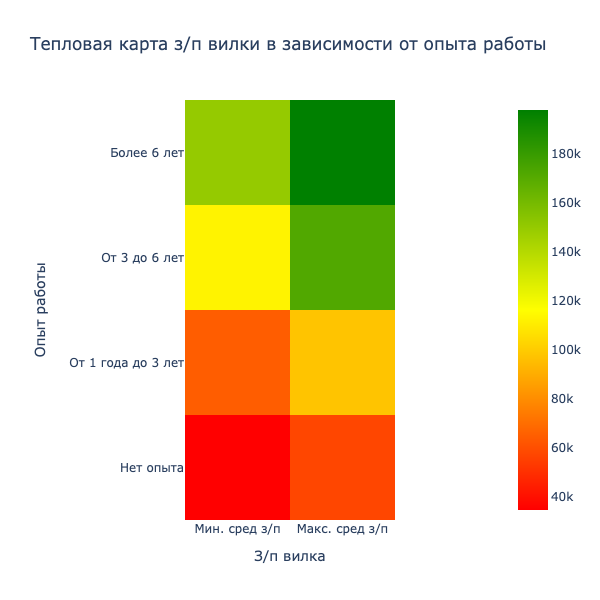

In [1920]:
import plotly
import plotly.express as px

# результат запроса
df_4_6 = pd.read_sql_query(query_4_6, connection)
df_4_6 = df_4_6.set_index('experience') 
# display(df_4_6) # проверка dataframe

# строим диаграмму
fig_heat = px.imshow(
    img=df_4_6,
    origin='upper',
    color_continuous_scale=['red', 'yellow', 'green'],
    title='Тепловая карта з/п вилки в зависимости от опыта работы',
    width=600,
    height=600
    )

# добавляем аннотацию
fig_heat.update_traces(
    hoverongaps=False,
    hovertemplate="Опыт работы: %{y}"
                  "<br>Уровень з/п: %{x}"
                  "<br>З/п(сред): %{z}<extra></extra>"
    )

# добавляем титулы осей
fig_heat.update_layout(
    xaxis_title='З/п вилка',
    yaxis_title='Опыт работы'
)
# отображаем тепловую карту
fig_heat.show('png')
# fig_heat.show()

#### **<span style=color:green>Юнит 4. Выводы по по детальному анализу вакансий**

После детального анализа вакансий можно сделать следующие предварительные выводы:
* Основная доля вакансий сосредоточена в крупных городах и столицах стран СНГ: в топ-5 по числу вакансий входят Москва, Санкт-Петербург, Минск, Новосибирск и Алматы (на данные города приходится примерно 30% всех вакансий) - *это связано с тем, чтов крупных городах расположено большинство предпрниятий и бизнес-центров*. 
* Примерно 72% вакансий имеют тип рабочего графика "полный день" и тип трудоустройства "полная занятость" - *работодатели отдают преимущество сотрудникам, которые полностью будут погружены в рабочий процесс.*
* Наиболее частые пожелания работодателей по опыту работы (53% вакансий) - от 1 до 3 лет - *это можно объяснить тем, что для получения начального уровня опыта достаточно 1 - 3 года, для дальнейшего карьерного роста часто используются внутренние трудовые ресурсы компании.* 
* Основное количество вакансий приходится на IT-технологии (разработка ПО, системная интеграция и автоматизация, Интернет-компания, мобильная связь) и банковскую сферу. На эти топ-5 отраслей приходится примерно 70% от общего числа вакансий. - *это тоже вполне естественно, ведь компьютерные технологии сейчас в том или ином виде присутствуют везде, в том числе и в финансовом секторе*
* Тепловая карта з/п вилки в зависимости от опыта работы показывает прямую зависимость средней з/п вилки (мин и макс уровни) от опыта работы 

***

# Юнит 5. Анализ работодателей

#### 1. Напишите запрос, который позволит узнать, какие работодатели находятся на **первом** и **пятом** месте по количеству вакансий.

In [1670]:
# текст запроса
query_5_1 = f'''
(select
    e.name empl_name, -- вывод списка работодателей
    count(v.id) cnt -- кол-во уникальных вакансий
from employers e
    join vacancies v on e.id = v.employer_id -- соединение таблиц 
group by  empl_name -- группировка по работодателям
order by cnt desc --сортировка по убыванию кол-ва вакансий
limit 1) -- вывод первого места из рейтинга по кол-ву вакансий
union all -- объединение возвращаемых sql-запросов
(select
    e.name empl_name,
    count(v.id) cnt 
from public.employers e
    left join public.vacancies v on e.id = v.employer_id 
group by  empl_name 
order by cnt desc 
offset 4 -- "вырезка" первых четырех строк
limit 1) -- вывод пятого места по кол-ву вакансий
'''
# в качестве альтернативы можно было вывести 1 и 5 место с помощью инструментов dataframe,
# но так как это проект по sql решил представить такое решение 

In [1671]:
# результат запроса
df_5_1 = pd.read_sql_query(query_5_1, connection)
# display(df_5_1) # проверка dataframe
print(f"Работодатели, находятся на первом и пятом месте по количеству вакансий:\n\
{' - '.join(df_5_1['empl_name'].values.tolist())}") # вывод ответа

Работодатели, находятся на первом и пятом месте по количеству вакансий:
Яндекс - Газпром нефть


#### 2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём. 
#### Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [1672]:
# текст запроса
query_5_2 = f'''
select
    a.name area_name, -- вывод списка регионов
    count(e.id) count_empl -- количество работодателей
from areas a
    join employers e on a.id = e.area /* соединение таблиц join 
        т.к. нас интересует наибольшее кол-во работодателей в регионе без вакансий
        использование left join также даст правильный ответ, но займет больше времени 
        и выдаст больше строк*/
    left join vacancies v on a.id = v.area_id /* соединение таблиц left join 
        т.к. в регионе может не быть вакансий */
where v.id is null -- выбор регионов, в которых нет вакансий
group by  area_name -- группировка по регионам
order by count_empl desc -- сортировка по убыванию работодателей
'''

In [1673]:
# результат запроса
df_5_2 = pd.read_sql_query(query_5_2, connection)
# проверка dataframe, не стал добавлять колонку с кол-вом вакансий т.к. после фильтрации
# where v.id is null в колонке все значения будут 0
# display(df_5_2)
print(f"Среди регионов, в которых нет вакансий, \
наибольшее количество работодателей в регионе: {df_5_2['area_name'][0]}") # вывод ответа

Среди регионов, в которых нет вакансий, наибольшее количество работодателей в регионе: Россия


#### 3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [1674]:
# текст запроса
query_5_3 = f'''
select
    e.name empl_name, -- список работодателей
    count(distinct v.area_id) count_area /* счет уникального кол-ва регионов 
        (без distinct считает кол-во вакансий) */
from employers e
    join vacancies v on e.id = v.employer_id -- соединение таблиц 
group by empl_name -- группировка по признаку
order by count_area desc -- сортировка по убыванию
'''

In [1675]:
# результат запроса
df_5_3 = pd.read_sql_query(query_5_3, connection)
print(f"{df_5_3['empl_name'][0]} публикует свои вакансии в \
наибольшем кол-ве регионов: {df_5_3['count_area'][0]}") # вывод ответа
display(df_5_3) # вывод dataframe (согласно первой части задания)

Яндекс публикует свои вакансии в наибольшем кол-ве регионов: 181


,empl_name,count_area
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
14761,UniSol,1
14762,UNISTORY LLC,1
14763,UNIT6,1
14764,United Distribution,1


#### 4. Напишите запрос для подсчёта **количества** работодателей, у которых *не указана сфера деятельности*. 

In [1676]:
# текст запроса
query_5_4 = f'''
select
    count(distinct e.id) cnt -- подсчет уникального кол-ва работодателей
from employers e
    full join employers_industries ei on e.id = ei.employer_id /* соединение таблиц по full join, 
        чтобы не потерять работодателей без сферы деятельности */
where ei.employer_id is null /* фильтрация соединенной таблицы 
        (оставляем только работодателей без указанной сферы деятельности) */
'''

In [1677]:
# результат запроса
df_5_4 = pd.read_sql_query(query_5_4, connection)
# display(df_5_4) # проверка dataframe
print(f"Количество работодателей, у которых не указана сфера деятельности: \
{df_5_4['cnt'][0]} ") # вывод ответа

Количество работодателей, у которых не указана сфера деятельности: 8419 


#### 5. Напишите запрос, чтобы узнать **название компании**, находящейся на *третьем* месте в *алфавитном списке* (по названию) компаний, у которых указано **четыре** сферы деятельности. 

In [1678]:
# текст запроса
query_5_5 = f'''
select
    e.name empl_name,
    count(ei.industry_id) cnt_industry -- подсчет кол-ва сфер деятельности
from employers e
    join employers_industries ei on e.id = ei.employer_id -- соединение таблиц
group by e.id
having count(ei.industry_id) = 4
order by empl_name
limit 3
'''

In [1701]:
# результат запроса
df_5_5 = pd.read_sql_query(query_5_5, connection)
print(f"{df_5_5['empl_name'][2]} находится на третьем месте в алфавитном списке (по названию) \
компаний, у которых указано четыре сферы деятельности.") # вывод ответа
display(df_5_5) # вывод dataframe

2ГИС находится на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности.


,empl_name,cnt_industry
0,101 Интернет,4
1,21vek.by,4
2,2ГИС,4


#### 6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана **"Разработка программного обеспечения"**.


In [1680]:
# текст запроса
query_5_6 = f'''
select
    count(ei.employer_id) cnt_empl -- подсчет кол-ва работодателей
from industries i
    join employers_industries ei on i.id = ei.industry_id -- соединение таблиц
group by i.name -- группировка по сфере деятельности
having i.name = 'Разработка программного обеспечения' -- фильтр по критерию
'''

In [1681]:
# результат запроса
df_5_6 = pd.read_sql_query(query_5_6, connection)
# display(df_5_6) # проверка dataframe
print(f"Сфера деятельности «Разработка программного обеспечения» \
указана у {df_5_6.iloc[0][0]} компаний") # вывод ответа

Сфера деятельности «Разработка программного обеспечения» указана у 3553 компаний


#### 7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [1682]:
# код для получения списка городов-милионников
import requests  # Импортируем библиотеку requests
from bs4 import BeautifulSoup # Импортируем библиотеку BeautifulSoup
# Определяем значение URL страницы для запроса
url = 'https://ru.wikipedia.org/wiki/Города-миллионеры_России'
response = requests.get(url) # Выполняем GET-запрос, содержимое ответа присваивается переменной response
soup = BeautifulSoup(response.text, 'html.parser') # Создаём объект BeautifulSoup, указывая html-парсер
city_list =[]
# цикл по строкам таблицы, где 'tr' - table row, 'td' - table data, [1] - 2я колонка
for items in soup.find('table', class_='standard sortable').find_all('tr')[1::1]: 
    data = items.find_all(['td'])
    try:
        city = data[1].a.text
    except IndexError: 
        pass
    # print(city) # проверка работы цикла
    city_list.append(city)
city_tuple = tuple(city_list)
# print(city_tuple) # проверка кортежа с городами - миллиониками

In [1683]:
# текст запроса
query_5_7 = f'''
select
    a.name,
    count(v.id) cnt -- подсчет общего кол-ва вакансий
from employers e
    join vacancies v on e.id = v.employer_id 
    join areas a on a.id = v.area_id
where e.name = 'Яндекс' and a.name in {city_tuple} -- фильтр по "Яндекс" и кортежу с городами
group by a.name -- группировка по отфильтрованным городам

union -- объединение таблицы со строкой Total

select
    'Total',
    count(v.id) -- подсчет общего кол-ва вакансий
from employers e
    join vacancies v on e.id = v.employer_id
    join areas a on a.id = v.area_id
where e.name = 'Яндекс' and a.name in {city_tuple} -- фильтр по "Яндекс" и кортежу с городами
order by cnt -- сортировка по cnt
'''

In [1684]:
# результат запроса
df_5_7 = pd.read_sql_query(query_5_7, connection)
print(f"Кол-во строк в выборке: {df_5_7.shape[0]}\n\
Результат в строке Total: {df_5_7.iloc[-1,1]}") # вывод ответа
display(df_5_7) # вывод dataframe

Кол-во строк в выборке: 17
Результат в строке Total: 485


,name,cnt
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Пермь,25
5,Казань,25
6,Ростов-на-Дону,25
7,Уфа,26
8,Самара,26
9,Краснодар,30


***

#### **<span style=color:green>Юнит 5. Выводы по анализу работодателей**

* Видим, что работодатели преимущественно размещают свои вакансии в городах-миллионерах и столицах, что неудивительно, ведь именно там обычно располагается большинство крупных компаний, административный учреждений и бизнес-центров. Также эти города являются центром притяжения для населения близлежащих регионов (а то и всей страны в целом), в них проживает больше людей и для их жизнеобеспечения требуется больше ресуросов. 
* Среди работодателей топ-5 лидеров по количеству размещенных вакансий занимают такие компании, как "Яндекс", "Ростелеком", "Сбер", "Тинькофф и Газпром, что тоже вполне ожидаемо, ведь это крупные корпорации, имеющие филиалы в нескольких городах и специализирующиеся на нескольких смежных областях. 
* Можем заметить, что данные были собраны не очень аккуратно. Например, формат указание региона регистрации компании явно не был согласован, и кто-то из опрошеных указал только страну, кто-то - название конкретного региона, кто-то - конкретный город. Это вносит дополнительные сложности в процесс анализа данных и приводит к некорректным результатам. Например, мы получили, что у нас в Ростовской области нет вакансий, в то время как в одном Ростове-на-Дону есть 25 вакансий компании "Яндекс". 
* То, что у 36% работодателей не указана сфера деятельности, тоже наводит на мысль о качестве собранных данных.

***

# Юнит 6. Предметный анализ

#### 1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

>*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [1686]:
# текст запроса
query_6_1 = f'''
select
    count(id) cnt -- подсчет кол-ва вакансий
from vacancies
where lower(name) like '%data%'
    or lower(name) like '%данн%' /* перевод названий вакансий в нижний регистр и проверка на
        вхождение элементов слов 'data' или 'данн' */
'''

In [1687]:
# результат запроса
df_6_1 = pd.read_sql_query(query_6_1, connection)
# display(df_6_1) # проверка dataframe
print(f"{df_6_1.iloc[0,0]} вакансий имеют отношение к данным") # вывод ответа

1771 вакансий имеют отношение к данным


#### 2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

* В следующих заданиях мы продолжим работать с вакансиями по этому условию.

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [1688]:
# сохраним текст запроса вакансий дата-сайентистов для сдедующих заданий
ds_vacancies = f'''
select *
from vacancies 
where lower(name) like '%data scientist%'
    or lower(name) like '%data science%'
    or lower(name) like '%исследователь данных%'
    or (name like '%ML%' and name not like '%HTML%')
    or lower(name) like '%machine learning%'
    or lower(name) like '%машинн%обучен%'
'''

In [1689]:
# текст запроса
query_6_2 = f'''
select
    count(*) cnt -- подсчет кол-ва вакансий
from -- используем код запроса для фильтра вакансий дата-сайентистов в качестве подзапроса
    (select *
    from vacancies 
    where lower(name) like '%data scientist%' -- критерии отбора вакансий дата-сайентистов
        or lower(name) like '%data science%'
        or lower(name) like '%исследователь данных%'
        or (name like '%ML%' and name not like '%HTML%')
        or lower(name) like '%machine learning%'
        or lower(name) like '%машинн%обучен%') as ds
where lower(ds.name) like '%junior%' -- дополнительные критерии отбора junior
    or ds.experience = 'Нет опыта'
    or ds.employment = 'Стажировка'
'''

In [1690]:
# результат запроса
df_6_2 = pd.read_sql_query(query_6_2, connection)
# display(df_6_2) # проверка dataframe
print(f"{df_6_2.iloc[0,0]} подходящих вакансий для начинающего дата-сайентиста") # вывод ответа

51 подходящих вакансий для начинающего дата-сайентиста


#### 3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

>*Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [1691]:
# текст запроса
query_6_3 = f'''
select
    count(*) cnt -- подсчет кол-ва вакансий
from -- используем код запроса для фильтра вакансий дата-сайентистов в качестве подзапроса
    (select *
    from vacancies 
    where lower(name) like '%data scientist%' -- критерии отбора вакансий дата-сайентистов
        or lower(name) like '%data science%'
        or lower(name) like '%исследователь данных%'
        or (name like '%ML%' and name not like '%HTML%')
        or lower(name) like '%machine learning%'
        or lower(name) like '%машинн%обучен%') as ds
where lower(ds.key_skills) like '%sql%' -- дополнительные критерии отбора SQL или postgres
    or lower(ds.key_skills) like '%postgres%'
'''

In [1692]:
# результат запроса
df_6_3 = pd.read_sql_query(query_6_3, connection)
# display(df_6_3) # проверка dataframe
print(f"{df_6_3.iloc[0,0]} вакансий для DS, \
в которых в качестве ключевого навыка указан SQL или postgres") # вывод ответа

201 вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres


#### 4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

>*Это можно сделать помощью запроса, аналогичного предыдущему.*

In [1693]:
# текст запроса
query_6_4 = f'''
select
    count(*) cnt -- подсчет кол-ва вакансий
from -- используем код запроса для фильтра вакансий дата-сайентистов в качестве подзапроса
    (select *
    from vacancies 
    where lower(name) like '%data scientist%' -- критерии отбора вакансий дата-сайентистов
        or lower(name) like '%data science%'
        or lower(name) like '%исследователь данных%'
        or (name like '%ML%' and name not like '%HTML%')
        or lower(name) like '%machine learning%'
        or lower(name) like '%машинн%обучен%') as ds_vacancies
where lower(key_skills) like '%python%' -- дополнительный критерий отбора Python
'''

In [1694]:
# результат запроса
df_6_4 = pd.read_sql_query(query_6_4, connection)
# display(df_6_4) # проверка dataframe
print(f"Кол-во вакансий, в которых в качестве ключевого навыка указан \
Python: {df_6_4.iloc[0,0]}") # вывод ответа

Кол-во вакансий, в которых в качестве ключевого навыка указан Python: 351


#### 5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [1695]:
# текст запроса
query_6_5 = f'''
select
    round( -- округление рез-та до 2 знаков
        avg( -- расчет средней
            length(ds.key_skills) - length(replace(ds.key_skills, chr(9), '')) + 1 -- замена chr(9) = \t на '' 
        ), 2
    )
from -- используем код запроса для фильтра вакансий дата-сайентистов в качестве подзапроса
    (select *
    from vacancies 
    where lower(name) like '%data scientist%' -- критерии отбора вакансий дата-сайентистов
        or lower(name) like '%data science%'
        or lower(name) like '%исследователь данных%'
        or (name like '%ML%' and name not like '%HTML%')
        or lower(name) like '%machine learning%'
        or lower(name) like '%машинн%обучен%') as ds
'''

In [1696]:
# результат запроса
df_6_5 = pd.read_sql_query(query_6_5, connection)
# display(df_6_5) # проверка dataframe
print(f"{df_6_5.iloc[0,0]} ключевых навыков в среднем указывают в вакансиях для DS") # вывод ответа

6.41 ключевых навыков в среднем указывают в вакансиях для DS


#### 6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

#### Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до **целого** числа. 

In [1697]:
# текст запроса
query_6_6 = f'''
select
    ds.experience,
    round( -- округляем до целого значения
        avg( -- агрегируем среднее значение
            case -- используем выбор по условию для поиска средней э/п (from - to)  
                when ds.salary_from is not null and ds.salary_to is not null
                    then (ds.salary_from + ds.salary_to) / 2
                when ds.salary_from is not null 
                    then ds.salary_from
                else ds.salary_to
            end), 0) as avg_salary
from -- используем код запроса для фильтра вакансий дата-сайентистов в качестве подзапроса
    (select *
    from vacancies 
    where lower(name) like '%data scientist%' -- критерии отбора вакансий дата-сайентистов
        or lower(name) like '%data science%'
        or lower(name) like '%исследователь данных%'
        or (name like '%ML%' and name not like '%HTML%')
        or lower(name) like '%machine learning%'
        or lower(name) like '%машинн%обучен%') as ds
where coalesce(ds.salary_from, 0) > 0 
    or coalesce(ds.salary_to, 0) > 0
group by experience
'''

In [1698]:
# результат запроса
df_6_6 = pd.read_sql_query(query_6_6, connection)
print(f"Дата-сайентист с опытом работы от 3 до 6 лет в среднем может рассчитывать на з/п \
{df_6_6['avg_salary'][2]} руб.") # вывод ответа
display(df_6_6) # вывод dataframe

Дата-сайентист с опытом работы от 3 до 6 лет в среднем может рассчитывать на з/п 243115.0 руб.


,experience,avg_salary
0,Нет опыта,74643.0
1,От 1 года до 3 лет,139675.0
2,От 3 до 6 лет,243115.0


***

#### **<span style=color:green>Дополнительные исслелования:**
#### 7. Выясним, как часто от специалистов по Data Science работодатели требуют знания Python и SQL/postgres
*Рассматриваются только вакансии Data Science с заполненными навыками (key_skills)*

In [1819]:
# текст запроса
query_6_7 = f'''
select
    'Python' ds_skill, 
    count(*) cnt -- кол-во вакансий DS с требуемым навыком Python
from -- используем код запроса для фильтра вакансий дата-сайентистов в качестве подзапроса
    (select *
    from vacancies 
    where lower(name) like '%data scientist%' -- критерии отбора вакансий дата-сайентистов
        or lower(name) like '%data science%'
        or lower(name) like '%исследователь данных%'
        or (name like '%ML%' and name not like '%HTML%')
        or lower(name) like '%machine learning%'
        or lower(name) like '%машинн%обучен%') as ds
where lower(ds.key_skills) like '%python%'
group by ds_skill

union 

select
    'SQL/postgres' ds_skill,
    count(*) cnt -- кол-во вакансий DS с требуемым навыком SQL или postgres
from -- используем код запроса для фильтра вакансий дата-сайентистов в качестве подзапроса
    (select *
    from vacancies 
    where lower(name) like '%data scientist%' -- критерии отбора вакансий дата-сайентистов
        or lower(name) like '%data science%'
        or lower(name) like '%исследователь данных%'
        or (name like '%ML%' and name not like '%HTML%')
        or lower(name) like '%machine learning%'
        or lower(name) like '%машинн%обучен%') as ds
where lower(ds.key_skills) like '%sql%'
    or lower(ds.key_skills) like '%postgres%'
group by ds_skill

union 

select
    'Python & SQL/postgres' ds_skill,
    count(*) cnt -- кол-во вакансий DS с требуемым навыком Python & SQL & postgres
from -- используем код запроса для фильтра вакансий дата-сайентистов в качестве подзапроса
    (select *
    from vacancies 
    where lower(name) like '%data scientist%' -- критерии отбора вакансий дата-сайентистов
        or lower(name) like '%data science%'
        or lower(name) like '%исследователь данных%'
        or (name like '%ML%' and name not like '%HTML%')
        or lower(name) like '%machine learning%'
        or lower(name) like '%машинн%обучен%') as ds
where lower(ds.key_skills) like '%python%'
    or lower(ds.key_skills) like '%sql%'
    or lower(ds.key_skills) like '%postgres%'
group by ds_skill

union 

select
    'Total w/o null' ds_skill,
    count(*) cnt -- всего кол-во вакансий DS с заполненным полем key_skills
from -- используем код запроса для фильтра вакансий дата-сайентистов в качестве подзапроса
    (select *
    from vacancies 
    where lower(name) like '%data scientist%' -- критерии отбора вакансий дата-сайентистов
        or lower(name) like '%data science%'
        or lower(name) like '%исследователь данных%'
        or (name like '%ML%' and name not like '%HTML%')
        or lower(name) like '%machine learning%'
        or lower(name) like '%машинн%обучен%') as ds
where key_skills is not null
group by ds_skill
order by cnt
'''

In [1820]:
# результат запроса
import plotly
import plotly.express as px

df_6_7 = pd.read_sql_query(query_6_7, connection)
# display(df_6_7) # вывод dataframe
fig = px.bar(
    data_frame=df_6_7, #датафрейм
    x="ds_skill", #ось x
    y="cnt", #ось y
    color='ds_skill', #расцветка в зависимости от навыка
    text = 'cnt', #текст на столбцах
    orientation='v', #ориентация графика
    title='Кол-во вакансий дата-сайентистов в навыками Python и SQL' #заголовок
)
# добавляем титулы осей и легенды
fig.update_layout(
    xaxis_title='Требуемые навыки',
    yaxis_title="Кол-во вакансий DS",
    legend_title="DS Skills:"
)
#отображаем график
fig.show()

#### **<span style=color:green>Дополнительные исслелования:**
#### 8. Какие компании чаще всего ищут специалистов по Data Science и их доля (нумерическая и взвещенная) от общего числа работодателей, разместивших вакансии дата-сайентистов

In [1873]:
# текст запроса
query_6_8 = f'''
(select 
    e.name as employer_name,
    'Top-13' category,
    count(ds.id) as ds_vacancies_count
from -- используем код запроса для фильтра вакансий дата-сайентистов в качестве подзапроса
    (select *
    from vacancies 
    where lower(name) like '%data scientist%' -- критерии отбора вакансий дата-сайентистов
        or lower(name) like '%data science%'
        or lower(name) like '%исследователь данных%'
        or (name like '%ML%' and name not like '%HTML%')
        or lower(name) like '%machine learning%'
        or lower(name) like '%машинн%обучен%') as ds
    join employers as e on e.id = ds.employer_id
group by e.id
order by count(ds.id) desc, employer_name
limit 13) -- 6 и более вакансий на работодателя

union

(select 
    e.name as employer_name,
    'Others',
    count(ds.id) as ds_vacancies_count
from -- используем код запроса для фильтра вакансий дата-сайентистов в качестве подзапроса
    (select *
    from vacancies 
    where lower(name) like '%data scientist%' -- критерии отбора вакансий дата-сайентистов
        or lower(name) like '%data science%'
        or lower(name) like '%исследователь данных%'
        or (name like '%ML%' and name not like '%HTML%')
        or lower(name) like '%machine learning%'
        or lower(name) like '%машинн%обучен%') as ds
    join employers as e on e.id = ds.employer_id
group by e.id
order by count(ds.id) desc, employer_name
offset 13)
order by ds_vacancies_count desc
'''

In [1876]:
import plotly
import plotly.express as px

# результат запроса
df_6_8 = pd.read_sql_query(query_6_8, connection)
print(f"Топ-13 из {df_6_8.shape[0]} работодателей, разместивших вакансии Data Science") # заголовок
display(df_6_8[df_6_8['category']=='Top-13']) # вывод dataframe таблицы

# Строим график
fig_pie = px.pie(
    data_frame=df_6_8, 
    values='ds_vacancies_count',
    names='category',
    color='category',
    color_discrete_map={'Others':'grey', 'Top-13':'green'},
    title='Доля вакансий Top-13 работодателей,\n\
        <br>ищущих Data Science специалистов',
    hole=0.3,
    labels={
             'employer_name': "Работодатель",
             'ds_vacancies_count': "Кол-во вакансий"
            },
    width=600,
    height=600
)

# добавляем титул легенды
fig_pie.update_layout(
    legend_title="Работодатели:"
)

# отображаем график
fig_pie.show()
#fig_pie.show("png")

Топ-13 из 225 работодателей, разместивших вакансии Data Science


,employer_name,category,ds_vacancies_count
0,СБЕР,Top-13,37
1,Bell Integrator,Top-13,25
2,Банк ВТБ (ПАО),Top-13,18
3,VK,Top-13,15
4,Positive Technologies,Top-13,11
5,Яндекс,Top-13,9
6,EvenBet Gaming,Top-13,9
7,МегаФон,Top-13,8
8,Andersen,Top-13,7
9,Ozon,Top-13,6


#### **<span style=color:red>Не забыть!!!**
* тор 5 ключевых навыков
* топ 5 названий вакансий по средней з/п
* соотношение опыта и средней э/п


Видим, что специалисты в области Data Science могут претендовать на очень высокую зарплату: в районе 75 тыс.руб. в месяц для новичков, в районе 140 тыс. рублей для специалистов со стажем и в около 243 тыс. руб. для опытных специалистов. И это весьма ожидаемо, ведь общеизвестно, что data scinetist является одной из наиболее высокооплачиваемых профессий в наши дни. Одним из ключевых навыков для промышленного специалиста в области DS и ML является владение языком python. В явном виде этот навык указан в 20% вакансий, но, я думаю, реальное количество будет больше, т.к. зачастую работодатель в требованиях указывает владения конкретными питоновскими фреймворками и библиотеками(scikit-learn, pandas, nltk и т.п.), специфичными для его проекта. Довольно важны и навыки SQL (11% вакансий). Математика, как мы знаем, тоже важна для DS, однако наличие математических знаний требуется лишь в 6% вакансий. Это объясняется тем, что на практике умение писать код, грамотно собирать и фильтровать данные и уже непосредственно обучать модели оказывается куда важнее каких-либо теоретических познаний. Новичку войти в отрасль не так-то просто - лишь в 3% вакансий работодатель готов принять специалиста без опыта работы. Основную часть вакансий по DS предоставляют такие крупные компании, как "Cбер", "ВТБ", "VK", "Яндекс" и др. Это тоже вполне ожидаемый результат: данные корпорации применяют ML в бизнесе и захватили достаточно большую часть рынка, их названия у всех на слуху.

# Общий вывод по проекту

#### **<span style=color:red>Не забыть!!!**
* тор 5 ключевых навыков
* топ 5 названий вакансий по средней з/п
* соотношение опыта и средней э/п

Итак, мы внимательно изучили данные с сайта HeadHunter, провели детальный анализ вакансий и работников, более подробно остановившись на вакансиях из Data Science. Проведенные дополнительные исследования отмечены звездочками в каждом из разделов. В целом, все полученные результаты соответствуют ожиданиям и согласуются с ситуацией, наблюдаемой на реальном рынке труда. Однако все же можно предположить, что в процессе сбора данных были допущены некоторые ошибки/неточности, которые затруднили последующий анализ (например, неточный формат указания адреса регистрации работодателя).

In [1700]:
# подведем итог исследования, обобщите выводы
# здесь можно (это будет плюсом) провести дополнительные исследования данных, сделать прогнозы, продумать варианты продолжения исследования